In [47]:
import pandas as pd

import numpy as np

import plotly.express as px

import matplotlib.pyplot as plt

In [19]:
def find_map_center(df, lat, long):
    """A function for finding the center of a list of given coordinates. Returns a dictionary
    -------------------------------------------------------------------
    df: a pandas dataframe
    lat: string. the dataframe column that contains the latitude values
    long: string. the dataframe column that contains the longitude values"""
    
    mid_lat = (df[lat].sort_values().iloc[0] + df[lat].sort_values().iloc[-1]) / 2
    mid_long = (df[long].sort_values().iloc[0] + df[long].sort_values().iloc[-1]) / 2
    
    return {"lat": mid_lat, "lon": mid_long}

def generate_5_ticks(dataframe, column):
    """A function specifically built for this project's map, generates the ticks needed for the scatterplot
    ------------------------------------------------------------------------
    dataframe: a pandas dataframe
    column: a column within the dataframe that you would like to sort. Must be a number (float, int, etc)"""
    
    logged = np.log(dataframe[column]).sort_values()
    list_of_logs = []
    
    l1, l5 = logged.iloc[0], logged.iloc[-1]
    l3 = np.mean([l1, l5])
    
    l2, l4 = np.mean([l1, l3]), np.mean([l3, l5])
    
    return [l1, l2, l3, l4, l5]

In [20]:
df = pd.read_pickle("data/cleaned_df.pkl")

In [44]:
#Adding coordinates and sales price columns to the dataframe for the hover data on the map
df["coordinates"] = [(abs(df.lat.loc[i]).astype(str) + "° N, " + abs(df.long.loc[i]).astype(str) + "° W") for i in df.index]
df["sale_price"] = df.price.apply(lambda x: "$" + str(x/1000) + "K")

#Setting the values for the scatterplot colorscale. Ticktext was manually obtained but you can verify by using np.exp(tickvalues)
tickvalues, ticktext = generate_5_ticks(df, "price"), ["$78K", "$245K", "$775K", "$2.4M" , "$7.7M"]

In [46]:
#finding the centerpoint of the map
coordinates = find_map_center(df, "lat", "long")

In [23]:
#Public read-only mapbox token
mapbox_token = "pk.eyJ1Ijoicm5odyIsImEiOiJja2NkZWwyMzYwZHZyMnptbGVycTRyeXR0In0.DJD_rTPSqw_4Qaj8LxM8gg"
px.set_mapbox_access_token(mapbox_token)

In [35]:
#Creating the initial map
fig = px.scatter_mapbox(df, lat="lat", lon="long", color=np.log(df.price),
                        center = coordinates,
                        zoom=8.4, width = 800, height = 600)


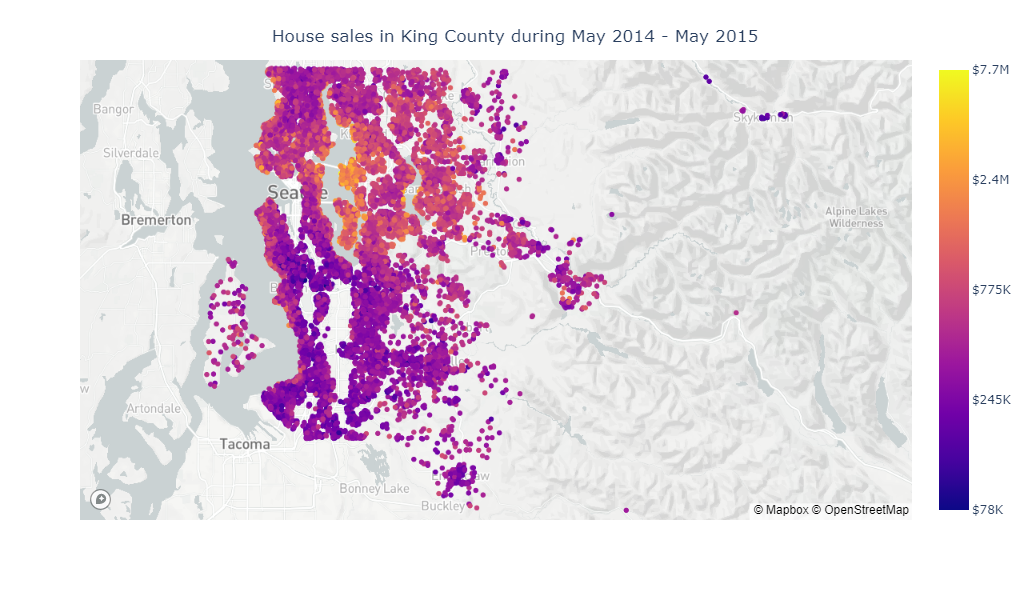

In [45]:
#Adding hover data
fig.update_traces(
    customdata = np.stack((df.sale_price, df.coordinates), axis = -1),
    hovertemplate="<b>%{customdata[0]}</b><br>"+
                  "%{customdata[1]}"
)

#Updating the color scale to reflect acutal prices instead of log prices
fig.update_coloraxes(colorbar = {"title": None, "tickvals" : tickvalues, "ticktext": ticktext})

#Adding and positioning map title
fig.update_layout(
    title = {
        "text" : "House sales in King County during May 2014 - May 2015",
        'x':0.5, 'y' : .95,
        "xanchor" : 'center', "yanchor" : "top"}) 

fig.show()